<a href="https://colab.research.google.com/github/MI9JAHIN/Data_mining_and_mechine_learning/blob/main/introduction_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression Using Pytorch


In [44]:
import numpy as np
from sklearn.linear_model import LinearRegression
import torch
import torch.optim as optim
import torch.nn as nn
#from torchviz import make_dot

In [45]:
true_b = 1
true_w = 2
N = 100
# Data Generation
np.random.seed(42)
x = np.random.rand(N, 1)
epsilon = (.1 * np.random.randn(N, 1))
y = true_b + true_w * x + epsilon #y = bias+mx+c

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(x,y,random_state=0,test_size=0.2)

Text(0.5, 1.0, 'Training')

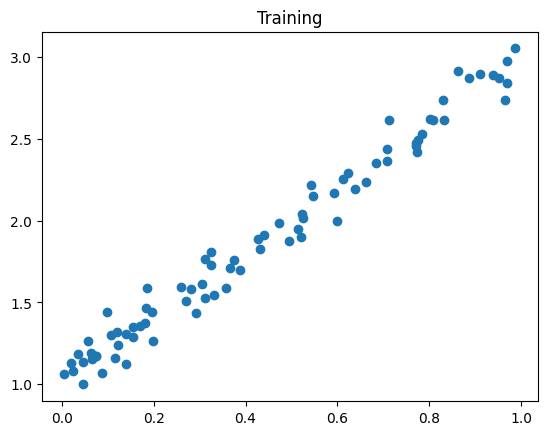

In [47]:
import matplotlib.pyplot as plt

plt.scatter(x_train,y_train)
plt.title('Training')

Text(0.5, 1.0, 'Test/ validation')

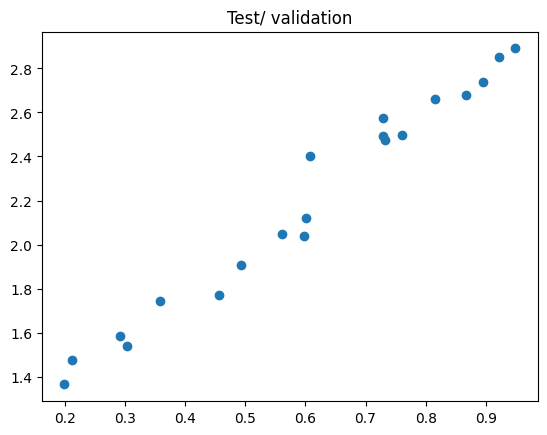

In [48]:
plt.scatter(x_val,y_val)
plt.title('Test/ validation')

### Deep Learning steps ###
1. Random Initialization
2. Computer Model's Prediction
3. Compute Loss
4. Compute Gredients
5. Update Parameters
6. Check and Repeat

Step 1- Random Initialization

In [49]:
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)
print(b, w)

[0.49671415] [-0.1382643]


Step 2 - Compute Model’s Predictions

In [50]:
yhat = b + w * x_train

Step 3 - Compute the Loss

In [51]:
error = (yhat - y_train)
# It is a regression, so it computes mean squared error (MSE)
loss = (error ** 2).mean()
print(loss)

2.4764231707631117


Step 4 - Compute the Gradients

In [52]:
b_grad = 2 * error.mean()
w_grad = 2 * (x_train * error).mean()
print(b_grad, w_grad)

-2.88147833906358 -1.6346706711146077


Step 5 - Update the Parameters

In [53]:
lr = 0.1
print(b, w)
# Step 4 - Updates parameters using gradients and
# the learning rate
b = b - lr * b_grad
w = w - lr * w_grad
print(b, w)

[0.49671415] [-0.1382643]
[0.78486199] [0.02520277]


Step 6 - Check and Repeat!

In [54]:
#keep doing the steps over and over again ..

# it is called epoch

So the total code should be like this

In [55]:
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)
print(b, w)
lr = 0.1
n_epochs = 1000
for epoch in range(n_epochs):
    yhat = b + w * x_train
    error = (yhat - y_train)
    loss = (error ** 2).mean()
    b_grad = 2 * error.mean()
    w_grad = 2 * (x_train * error).mean()
    b = b - lr * b_grad
    w = w - lr * w_grad
print(b, w)

[0.49671415] [-0.1382643]
[1.02717144] [1.94625789]


In [56]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [57]:
print(lr.intercept_,lr.coef_)

[1.02717124] [[1.94625831]]


AREN'T WE VERY CLOSE TO THE ACTUAL VALUE

In [58]:
#visualization

y_pred = [ b+w*x for x in x_val ]

In [59]:
print(y_pred)

[array([1.41578812]), array([2.44717322]), array([2.45182042]), array([2.82137644]), array([2.44600739]), array([2.11956161]), array([1.61930531]), array([2.61426968]), array([2.19083899]), array([1.98822502]), array([2.76873623]), array([2.50785534]), array([1.72483819]), array([1.44043811]), array([2.7129736]), array([2.2096104]), array([1.59576027]), array([1.91480125]), array([2.8739474]), array([2.19709627])]


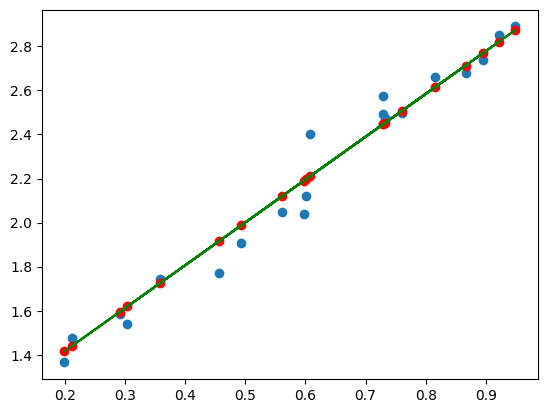

In [60]:
plt.scatter(x_val,y_val)
plt.scatter(x_val,y_pred,c="red")
plt.plot(x_val,y_pred,c='green')

### Now it is torch time ###

In [61]:
scalar = torch.tensor(3.14159)
vector = torch.tensor([1, 2, 3])
matrix = torch.ones((2, 3), dtype=torch.float)
tensor = torch.randn((2, 3, 4), dtype=torch.float)
print(scalar)
print(vector)
print(matrix)
print(tensor)

tensor(3.1416)
tensor([1, 2, 3])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[[ 0.9007, -2.1055,  0.6784, -1.2345],
         [-0.0431, -1.6047,  1.7878, -0.4780],
         [-0.4934,  0.2415, -1.1109,  0.0915]],

        [[-2.3169, -0.2168, -1.3847, -0.8712],
         [ 0.8034, -0.6216, -0.5920, -0.0631],
         [-0.8286,  0.3309, -1.5576,  0.9956]]])


In [62]:
tensor.shape

torch.Size([2, 3, 4])

In [63]:
scalar.shape

torch.Size([])

In [64]:
tensor.view(1,24) #doesn't change the internal representation

tensor([[ 0.9007, -2.1055,  0.6784, -1.2345, -0.0431, -1.6047,  1.7878, -0.4780,
         -0.4934,  0.2415, -1.1109,  0.0915, -2.3169, -0.2168, -1.3847, -0.8712,
          0.8034, -0.6216, -0.5920, -0.0631, -0.8286,  0.3309, -1.5576,  0.9956]])

In [65]:
#to duplicate a tensor
another_matrix = matrix.view(1, 6).clone().detach()

In [66]:
another_matrix

tensor([[1., 1., 1., 1., 1., 1.]])

Why Pytorch then? because we can load it to gpu

In [67]:
x_train_tensor = torch.as_tensor(x_train)
x_train.dtype,x_train_tensor.dtype

(dtype('float64'), torch.float64)

In [68]:
float_tensor = x_train_tensor.float()
float_tensor.dtype

torch.float32

### These are CPU tensors , It's time for GPU tensors,upload your codes to colab and we will use the free gpu ###

In [69]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [70]:
device

'cuda'

In [71]:
n_cudas = torch.cuda.device_count()
for i in range(n_cudas):
    print(torch.cuda.get_device_name(i))

Tesla T4


In [78]:
gpu_tensor = torch.as_tensor(x_train).to(device)
gpu_tensor[0]

tensor([0.9093], device='cuda:0', dtype=torch.float64)

Step 1

In [79]:
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, dtype=torch.float)
w = torch.randn(1, requires_grad=True, dtype=torch.float)
print(b, w)

tensor([0.3367], requires_grad=True) tensor([0.1288], requires_grad=True)


In [80]:
torch.manual_seed(42)
b = torch.randn(1, dtype=torch.float).to(device)
w = torch.randn(1, dtype=torch.float).to(device)
b.requires_grad_()
w.requires_grad_()
print(b, w)

tensor([0.3367], device='cuda:0', requires_grad=True) tensor([0.1288], device='cuda:0', requires_grad=True)


In [32]:
#send to device while creating the tensor
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, \
dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, \
dtype=torch.float, device=device)
print(b, w)

tensor([0.1940], device='cuda:0', requires_grad=True) tensor([0.1391], device='cuda:0', requires_grad=True)


In [33]:
x_train_tensor = torch.as_tensor(x_train).to(device)
y_train_tensor = torch.as_tensor(y_train).to(device)

In [34]:
# Step 2 - Computes our model's predicted output - forward pass
yhat = b + w * x_train_tensor
# Step 3 - Computes the loss
# We are using ALL data points, so this is BATCH gradient
# descent. How wrong is our model? That's the error!
error = (yhat - y_train_tensor)
# It is a regression, so it computes mean squared error (MSE)
loss = (error ** 2).mean()
# Step 4 - Computes gradients for both "b" and "w" parameters
# No more manual computation of gradients!
# b_grad = 2 * error.mean()
# w_grad = 2 * (x_tensor * error).mean()
loss.backward()

In [35]:
print(error.requires_grad, yhat.requires_grad, \
b.requires_grad, w.requires_grad)
print(y_train_tensor.requires_grad, x_train_tensor.requires_grad)

True True True True
False False


In [36]:
print(b.grad, w.grad)

tensor([-3.2446], device='cuda:0') tensor([-1.7432], device='cuda:0')


In [37]:
b.grad.zero_(), w.grad.zero_()

(tensor([0.], device='cuda:0'), tensor([0.], device='cuda:0'))

In [38]:
lr = 0.1
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True,dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True,dtype=torch.float, device=device)
n_epochs = 1000


for epoch in range(n_epochs):
    yhat = b + w * x_train_tensor
    error = (yhat - y_train_tensor)
    loss = (error ** 2).mean()
    loss.backward()
    with torch.no_grad():
        b -= lr * b.grad
        w -= lr * w.grad
        b.grad.zero_()
        w.grad.zero_()
print(b, w)

tensor([1.0272], device='cuda:0', requires_grad=True) tensor([1.9463], device='cuda:0', requires_grad=True)


### Easy way

In [39]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
# Our data was in Numpy arrays, but we need to transform them
# into PyTorch's Tensors and then send them to the
# chosen device
x_train_tensor = torch.as_tensor(x_train).float().to(device)
y_train_tensor = torch.as_tensor(y_train).float().to(device)

lr = 0.1
torch.manual_seed(42)
model = nn.Sequential(nn.Linear(1, 1)).to(device)
optimizer = optim.SGD(model.parameters(), lr=lr)
loss_fn = nn.MSELoss(reduction='mean')
n_epochs = 1000
for epoch in range(n_epochs):
    model.train()
    yhat = model(x_train_tensor)
    loss = loss_fn(yhat, y_train_tensor)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

In [40]:
print(model.state_dict())

OrderedDict([('0.weight', tensor([[1.9463]], device='cuda:0')), ('0.bias', tensor([1.0272], device='cuda:0'))])


In [41]:
w = model.state_dict()['0.weight'].to('cpu')
b = model.state_dict()['0.bias'].to('cpu')

In [42]:
y_pred = [ (b+w*x).item() for x in x_val ]

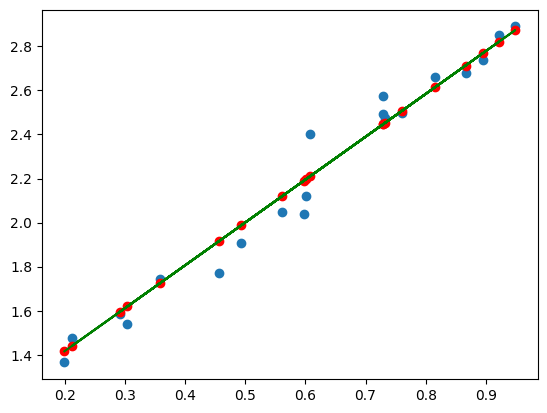

In [43]:
plt.scatter(x_val,y_val)
plt.scatter(x_val,y_pred,c="red")
plt.plot(x_val,y_pred,c='green')